In [0]:
%tensorflow_version 1.x
!git clone https://github.com/matterport/Mask_RCNN
!git clone https://github.com/skimkoh/cv_dataset
#%mv Mask_RCNN Mask_RCNN_tfv1
#!tf_upgrade_v2 --intree Mask_RCNN_tfv1 --outtree Mask_RCNN
#%rm -r Mask_RCNN_tfv1

TensorFlow 1.x selected.
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 116.75 MiB | 13.08 MiB/s, done.
Resolving deltas: 100% (567/567), done.
Cloning into 'cv_dataset'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 6051 (delta 43), reused 54 (delta 23), pack-reused 5969
Receiving objects: 100% (6051/6051), 134.38 MiB | 12.34 MiB/s, done.
Resolving deltas: 100% (3016/3016), done.
Checking out files: 100% (6599/6599), done.


In [0]:
%run cv_dataset/json_files/parse_files.py

orange001S(1) has 6 regions recorded
orange001S(2) has 6 regions recorded
orange001T(1) has 6 regions recorded
orange001T(2) has 4 regions recorded
did not find exactly 1 coin mask for orange001T(2)
apple001S(1) has no regions recorded
apple001S(2) has no regions recorded
apple001T(1) has no regions recorded
apple001T(2) has no regions recorded
apple002S(1) has no regions recorded
apple002S(2) has no regions recorded
apple002S(3) has no regions recorded
apple002S(4) has no regions recorded
apple002S(5) has no regions recorded
apple002S(6) has no regions recorded
apple002S(7) has no regions recorded
apple002S(8) has no regions recorded
apple002T(1) has no regions recorded
apple002T(2) has no regions recorded
apple002T(3) has no regions recorded
apple002T(4) has no regions recorded
apple002T(5) has no regions recorded
apple002T(6) has no regions recorded
apple003S(1) has no regions recorded
apple003S(2) has no regions recorded
apple003S(3) has no regions recorded
apple003S(4) has no regi

In [0]:
%ls cv_dataset/mask_arrs

'apple001S(1)_mask_class.npy'               'mango005S(10)_mask_class.npy'
'apple001S(1)_mask.npy'                     'mango005S(10)_mask.npy'
'apple001S(2)_mask_class.npy'               'mango005S(11)_mask_class.npy'
'apple001S(2)_mask.npy'                     'mango005S(11)_mask.npy'
'apple001T(1)_mask_class.npy'               'mango005S(12)_mask_class.npy'
'apple001T(1)_mask.npy'                     'mango005S(12)_mask.npy'
'apple001T(2)_mask_class.npy'               'mango005S(1)_mask_class.npy'
'apple001T(2)_mask.npy'                     'mango005S(1)_mask.npy'
'apple002S(1)_mask_class.npy'               'mango005S(2)_mask_class.npy'
'apple002S(1)_mask.npy'                     'mango005S(2)_mask.npy'
'apple002S(2)_mask_class.npy'               'mango005S(3)_mask_class.npy'
'apple002S(2)_mask.npy'                     'mango005S(3)_mask.npy'
'apple002S(3)_mask_class.npy'               'mango005S(4)_mask_class.npy'
'apple002S(3)_mask.npy'                     'mango005S(4)_mask.npy'


In [0]:
%cd Mask_RCNN
!pip install -r requirements.txt
!pip uninstall -y keras
!pip install keras==2.2.5
!python3 setup.py install

/content/Mask_RCNN
     |████████████████████████████████| 163kB 4.0MB/s 
     |████████████████████████████████| 204kB 47.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=15987f2a28b0837bc737f27f6e9f4d0e795bab3d2da6bfe8f1056e72d9a84fb4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 337kB 2.8MB/s 
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 

In [0]:
import os, sys, glob, random
import numpy as np
import shutil

In [0]:
# preprocess for train/val split
seed = 1557
random.seed(seed)

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
food_types = ['apple', 'orange', 'plum', 'banana', 'lemon', 'sachima',
                 'bread', 'peach', 'qiwi', 'tomato', 'grape', 'egg', 'litchi',
                 'bun', 'doughnut', 'fired_dough_twist', 'mango', 'mooncake', 
                 'pear']

train_percentage = 0.9
images, train_images, val_images = {}, {}, {}
for food_type in food_types:
    images[food_type] = []
for idx, file in enumerate(glob.glob(os.path.join(ROOT_DIR,
                                    "/content/cv_dataset/mask_arrs",
                                   "*_mask.npy"))):
    name = file.split("/")[-1][:-9]
    food_type = name.split("0")[0]
    images[food_type].append(name)

for food_type in food_types:
    l = images[food_type]
    random.shuffle(l)
    threshold = int(np.round(len(l) * train_percentage))
    train_images[food_type] = l[:threshold]
    val_images[food_type] = l[threshold:]

In [0]:
path_lists = ["/content/cv_dataset/train_imgs",
              "/content/cv_dataset/val_imgs",
              "/content/cv_dataset/train_masks",
              "/content/cv_dataset/val_masks"]
for path in path_lists:
    if not os.path.exists(os.path.join(ROOT_DIR, path)):
        os.mkdir(os.path.join(ROOT_DIR, path))

In [0]:
for food_type in food_types:
    print("Copying files for train dataset for class {}".format(food_type))
    for img in train_images[food_type]:
        src_img = os.path.join(ROOT_DIR, "/content/cv_dataset/JPEGImages/{}.JPG".format(img))
        src_mask = os.path.join(ROOT_DIR, "/content/cv_dataset/mask_arrs/{}_mask.npy".format(img))
        src_mask_class = os.path.join(ROOT_DIR, "/content/cv_dataset/mask_arrs/{}_mask_class.npy".format(img))

        dst_img = os.path.join(ROOT_DIR, "/content/cv_dataset/train_imgs/{}.JPG".format(img))
        dst_mask = os.path.join(ROOT_DIR, "/content/cv_dataset/train_masks/{}_mask.npy".format(img))
        dst_mask_class = os.path.join(ROOT_DIR, "/content/cv_dataset/train_masks/{}_mask_class.npy".format(img))

        shutil.copyfile(r'{}'.format(src_img), r'{}'.format(dst_img))
        shutil.copyfile(r'{}'.format(src_mask), r'{}'.format(dst_mask))
        shutil.copyfile(r'{}'.format(src_mask_class), r'{}'.format(dst_mask_class))

for food_type in food_types:
    print("Copying files for val dataset for class {}".format(food_type))
    for img in val_images[food_type]:
        src_img = os.path.join(ROOT_DIR, "/content/cv_dataset/JPEGImages/{}.JPG".format(img))
        src_mask = os.path.join(ROOT_DIR, "/content/cv_dataset/mask_arrs/{}_mask.npy".format(img))
        src_mask_class = os.path.join(ROOT_DIR, "/content/cv_dataset/mask_arrs/{}_mask_class.npy".format(img))

        dst_img = os.path.join(ROOT_DIR, "/content/cv_dataset/val_imgs/{}.JPG".format(img))
        dst_mask = os.path.join(ROOT_DIR, "/content/cv_dataset/val_masks/{}_mask.npy".format(img))
        dst_mask_class = os.path.join(ROOT_DIR, "/content/cv_dataset/val_masks/{}_mask_class.npy".format(img))

        shutil.copyfile(r'{}'.format(src_img), r'{}'.format(dst_img))
        shutil.copyfile(r'{}'.format(src_mask), r'{}'.format(dst_mask))
        shutil.copyfile(r'{}'.format(src_mask_class), r'{}'.format(dst_mask_class))

Copying files for train dataset for class apple
Copying files for train dataset for class orange
Copying files for train dataset for class plum
Copying files for train dataset for class banana
Copying files for train dataset for class lemon
Copying files for train dataset for class sachima
Copying files for train dataset for class bread
Copying files for train dataset for class peach
Copying files for train dataset for class qiwi
Copying files for train dataset for class tomato
Copying files for train dataset for class grape
Copying files for train dataset for class egg
Copying files for train dataset for class litchi
Copying files for train dataset for class bun
Copying files for train dataset for class doughnut
Copying files for train dataset for class fired_dough_twist
Copying files for train dataset for class mango
Copying files for train dataset for class mooncake
Copying files for train dataset for class pear
Copying files for val dataset for class apple
Copying files for val dat

In [0]:
import math
import re
import time
import cv2
import matplotlib
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Using TensorFlow backend.


... done downloading pretrained model!


## Configurations

In [0]:
class FoodConfig(Config):
    """Configuration for training on the food dataset.
    Derives from the base Config class and overrides values specific
    to the food dataset.
    """
    # Give the configuration a recognizable name
    NAME = "Food"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Or at least that's what I thought,
    # because Google Colab cried when I tried to fit the model.
    # Batch size is 2 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2

    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    # default 0.7
    RPN_NMS_THRESHOLD = 0.7

    # defaults
    BACKBONE = "resnet101"
    COMPUTE_BACKBONE_SHAPE = None
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]
    FPN_CLASSIF_FC_LAYERS_SIZE = 1024
    TOP_DOWN_PYRAMID_SIZE = 256
    RPN_ANCHOR_RATIOS = [0.5, 1, 2]
    RPN_ANCHOR_STRIDE = 1
    RPN_TRAIN_ANCHORS_PER_IMAGE = 256
    PRE_NMS_LIMIT = 6000
    POST_NMS_ROIS_TRAINING = 2000
    POST_NMS_ROIS_INFERENCE = 1000
    USE_MINI_MASK = True
    MINI_MASK_SHAPE = (56, 56)
    IMAGE_MIN_SCALE = 0
    IMAGE_CHANNEL_COUNT = 3
    MEAN_PIXEL = np.array([123.7, 116.8, 103.9])
    ROI_POSITIVE_RATIO = 0.33
    POOL_SIZE = 7
    MASK_POOL_SIZE = 14
    MASK_SHAPE = [28, 28]
    RPN_BBOX_STD_DEV = np.array([0.1, 0.1, 0.2, 0.2])
    BBOX_STD_DEV = np.array([0.1, 0.1, 0.2, 0.2])
    DETECTION_MIN_CONFIDENCE = 0.7
    DETECTION_NMS_THRESHOLD = 0.3
    LEARNING_RATE = 0.0001
    LEARNING_MOMENTUM = 0.9
    WEIGHT_DECAY = 0.0001
    '''
    LOSS_WEIGHTS = {
        "rpn_class_loss": 1.,
        "rpn_bbox_loss": 0.025,
        "mrcnn_class_loss": 0.008,
        "mrcnn_bbox_loss": 0.01,
        "mrcnn_mask_loss": 0.007
    }
    '''
    LOSS_WEIGHTS = {
        "rpn_class_loss": 100.,
        "rpn_bbox_loss": 1.,
        "mrcnn_class_loss": 5.,
        "mrcnn_bbox_loss": 1.,
        "mrcnn_mask_loss": 1.
    }
    USE_RPN_ROIS = True
    TRAIN_BN = False
    GRADIENT_CLIP_NORM = 5.0

    # Input image resizing
    IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 612
    IMAGE_MAX_DIM = 960

    # Number of classes (including background)
    # We have 19 food items plus the background and the coin for scale
    NUM_CLASSES = 21

    # anchor scales is default
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # datset is about 2500 images large
    STEPS_PER_EPOCH = 2000

    # 50 validation steps appropriately sized for dataset
    VALIDATION_STEPS = 50

    # we only have a few objects in the image so we reduce the # of instances
    MAX_GT_INSTANCES = 5
    DETECTION_MAX_INSTANCES = 20
    
config = FoodConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        20
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  960
IMAGE_META_SIZE                33
IMAGE_MIN_DIM                  612
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [960 960   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 100.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 5.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE           

## Notebook Preferences

In [0]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Dataset

Create the food dataset

Extend the Dataset class

In [0]:
class FoodDataset(utils.Dataset):
    "Gets the images and masks from the directory"
    def __init__(self, img_path, mask_path):
        super().__init__(self)

        self.img_path = img_path
        self.mask_path = mask_path

        # add source name
        self.source = "Food"

        # add classes
        self.foods = ['apple', 'orange', 'plum', 'banana', 'lemon', 'sachima',
                 'bread', 'peach', 'qiwi', 'tomato', 'grape', 'egg', 'litchi',
                 'bun', 'doughnut', 'fired_dough_twist', 'mango', 'mooncake', 
                 'pear', 'coin']
        for idx, food in enumerate(self.foods):
            self.add_class(self.source, idx+1, self.foods[idx])

        # add images
        for idx, file in enumerate(glob.glob(os.path.join(self.img_path, 
                                                          "*.JPG"))):
            name = file.split('/')[-1].split('.')[0]
            mask_name = os.path.join(mask_path, '{}_mask.npy'.format(name))
            mask_class_name = os.path.join(mask_path,
                                           '{}_mask_class.npy'.format(name))
            if os.path.exists(mask_name) and os.path.exists(mask_class_name):
                self.add_image(source=self.source, image_id=idx, name=name,
                               path=file, mask_name=mask_name,
                               mask_class_name=mask_class_name)
                
    
    def image_reference(self, image_id):
        """Return a link to the image in its source Website or details about
        the image that help looking it up or debugging it.

        Override for your dataset, but pass to this function
        if you encounter images not in your dataset.
        """
        info = self.image_info[image_id]
        if info["source"] == "Food":
            return info["path"]
        else:
            super(self.__class__).image_reference(self, image_id)

    def load_mask(self, image_id):
        """Load instance masks for the given image.

        Different datasets use different ways to store masks. Override this
        method to load instance masks and return them in the form of am
        array of binary masks of shape [height, width, instances].

        Returns:
            masks: A bool array of shape [height, width, instance count] with
                a binary mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        # Override this function to load a mask from your dataset.
        # Otherwise, it returns an empty mask.
        info = self.image_info[image_id]
        mask = np.load(info['mask_name'])
        class_ids = np.load(info['mask_class_name'])
        return mask, class_ids

In [0]:
class InferenceConfig(FoodConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

In [0]:
img_path_train = os.path.join(ROOT_DIR, "/content/cv_dataset/train_imgs")
mask_path_train = os.path.join(ROOT_DIR, "/content/cv_dataset/train_masks")
img_path_val = os.path.join(ROOT_DIR, "/content/cv_dataset/val_imgs")
mask_path_val = os.path.join(ROOT_DIR, "/content/cv_dataset/val_masks")
food_train = FoodDataset(img_path_train, mask_path_train)
food_val = FoodDataset(img_path_val, mask_path_val)
food_train.prepare()
food_val.prepare()

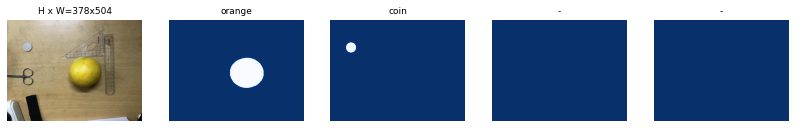

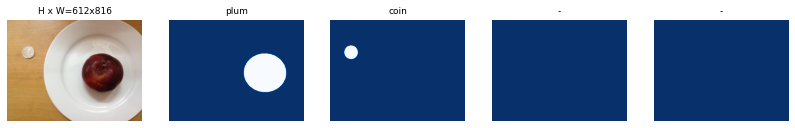

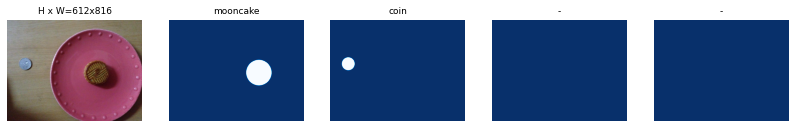

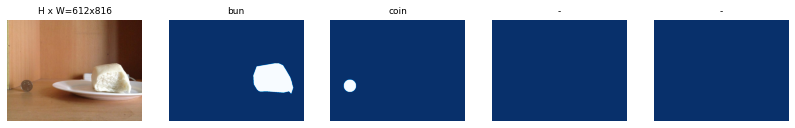

In [0]:
# Load and display random samples
image_ids = np.random.choice(food_train.image_ids, 4)
for image_id in image_ids:
    image = food_train.load_image(image_id)
    mask, class_ids = food_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, food_train.class_names)

## Create Model

In [0]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [0]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

augmentation = iaa.Sequential([iaa.Fliplr(0.5),
                               iaa.Sometimes(0.3, iaa.GaussianBlur((0.0, 1.0))),
                               iaa.Sometimes(0.3, iaa.CropAndPad(px=(0, 10), pad_mode="edge")),
                               iaa.Sometimes(0.3, iaa.Affine(rotate=(-15, 15)))])

In [0]:
def view_predictions(display_imgs=10, map_images=25):

    # Recreate the model in inference mode
    inf_model = modellib.MaskRCNN(mode="inference", 
                            config=inference_config,
                            model_dir=MODEL_DIR)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR, ".h5 file name here")
    #model_path = inf_model.find_last()
    model_path = "mask_rcnn_food.h5"

    # Load trained weights
    print("Loading weights from ", model_path)
    inf_model.load_weights(model_path, by_name=True)

    # Check the quality of detection
    for x in range(display_imgs):
        # Test on a random image
        image_id = random.choice(food_val.image_ids)
        original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(food_val, inference_config, 
                                image_id, use_mini_mask=False)
        log("original_image", original_image)
        log("image_meta", image_meta)
        log("gt_class_id", gt_class_id)
        log("gt_bbox", gt_bbox)
        log("gt_mask", gt_mask)

        visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                                    food_train.class_names, figsize=(8, 8))
        results = inf_model.detect([original_image], verbose=1)

        r = results[0]
        visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                                    food_val.class_names, r['scores'], ax=get_ax())
        
    # Compute VOC-Style mAP @ IoU=0.5
    # Running on 25 images. Increase for better accuracy.
    image_ids = np.random.choice(food_val.image_ids, map_images)
    APs = []
    for image_id in image_ids:
        # Load image and ground truth data
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(food_val, inference_config,
                                image_id, use_mini_mask=False)
        molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
        # Run object detection
        results = inf_model.detect([image], verbose=0)
        r = results[0]
        # Compute AP
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                            r["rois"], r["class_ids"], r["scores"], r['masks'])
        APs.append(AP)
        
    print("mAP: ", np.mean(APs))

## Training

Train the heads for 10 epochs

In [0]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(food_train, food_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=10,
            layers='heads',
            augmentation=augmentation)


Starting at epoch 0. LR=0.0001

Checkpoint Path: /logs/food20200413T0827/mask_rcnn_food_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistri

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/10
2000/2000 [==============================] - 3152s 2s/step - loss: 2.2431 - rpn_class_loss: 0.1342 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 1.2951 - mrcnn_bbox_loss: 0.3551 - mrcnn_mask_loss: 0.3712 - val_loss: 1.3563 - val_rpn_class_loss: 0.0604 - val_rpn_bbox_loss: 0.0497 - val_mrcnn_class_loss: 0.7736 - val_mrcnn_bbox_loss: 0.2596 - val_mrcnn_mask_loss: 0.2129

Epoch 2/10
2000/2000 [==============================] - 3094s 2s/step - loss: 0.9628 - rpn_class_loss: 0.0666 - rpn_bbox_loss: 0.0611 - mrcnn_class_loss: 0.4559 - mrcnn_bbox_loss: 0.2024 - mrcnn_mask_loss: 0.1768 - val_loss: 0.8229 - val_rpn_class_loss: 0.0197 - val_rpn_bbox_loss: 0.0540 - val_mrcnn_class_loss: 0.4061 - val_mrcnn_bbox_loss: 0.1978 - val_mrcnn_mask_loss: 0.1453
Epoch 3/10
2000/2000 [==============================] - 3093s 2s/step - loss: 0.7232 - rpn_class_loss: 0.0563 - rpn_bbox_loss: 0.0533 - mrcnn_class_loss: 0.3278 - mrcnn_bbox_loss: 0.1549 - mrcnn_mask_loss: 0.1310 - val_loss: 0.5663 - val

In [0]:
# check quality
view_predictions(10, 25)

In [0]:
# Recreate the model in inference mode
inf_model = modellib.MaskRCNN(mode="inference", 
                        config=inference_config,
                        model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = inf_model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
inf_model.load_weights(model_path, by_name=True)

In [0]:
# Check correct predictions (classes, masks)

total_correct, total = 0, 0
gt_classes = [0 for x in range(20)]
correct_classes = [0 for x in range(20)]
class_mask_metrics = [{'accuracy': 0., 'sensitivity': 0.,
                       'specificity': 0., 'f1_score': 0.} for x in range(20)]
food_masks = np.zeros((config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM, 0), dtype=bool)
coin_masks = np.zeros((config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM, 0), dtype=bool)
food_classes, food_urls = [], []
for id in food_val.image_ids:
    total += 1
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(food_val, inference_config, 
                            id, use_mini_mask=False)
    results = inf_model.detect([original_image], verbose=0)[0]
    gt_food = np.min(gt_class_id)-1
    gt_classes[gt_food] += 1
    strict_match = True
    if (all(np.sort(gt_class_id) == np.sort(results['class_ids'][:2]))
        and (not strict_match or len(results['class_ids']) == 2)):
        masks = results['masks'][:,:,:2]
        masks = masks[:,:, np.argsort(results['class_ids'][:2])]
        gt_mask = gt_mask[:,:, np.argsort(gt_class_id[:2])]
        food_masks = np.concatenate((food_masks, masks[:,:,:1]), axis=2)
        coin_masks = np.concatenate((coin_masks, masks[:,:,1:]), axis=2)
        food_classes.append(gt_food)
        food_urls.append(food_val.image_reference(id).split("/")[-1])
        correct_classes[gt_food] += 1
        total_correct += 1

        pixel_total = np.product(gt_mask.shape)
        p = np.sum(gt_mask)
        n = pixel_total - p
        tp = np.sum(masks * gt_mask)
        tn = np.sum(np.logical_not(masks) * np.logical_not(gt_mask))
        accuracy, sensitivity, specificity = (tp+tn)/pixel_total, tp/p, tn/n
        f1_score = 2 * sensitivity * specificity / (sensitivity + specificity)
        class_mask_metrics[gt_food]['accuracy'] += accuracy
        class_mask_metrics[gt_food]['sensitivity'] += sensitivity
        class_mask_metrics[gt_food]['specificity'] += specificity
        class_mask_metrics[gt_food]['f1_score'] += f1_score

for idx, food_type in enumerate(class_mask_metrics):
    for key in food_type:
        if correct_classes[idx] != 0:
            food_type[key] /= correct_classes[idx]
food_classes = np.array(food_classes)
print("Correct prediction %: {:.3f}".format(100.*total_correct/total))
for idx, food_type in enumerate(food_types):
    print("Correct prediction % for {}: {:.3f} Mask metrics:".format(food_type, 100.*correct_classes[idx]/gt_classes[idx]))
    print("Accuracy: {:.3f}, Sensitivity: {:.3f}, Specificity: {:.3f}, F1 Score: {:.3f}".format(
        class_mask_metrics[idx]['accuracy'], class_mask_metrics[idx]['sensitivity'],
        class_mask_metrics[idx]['specificity'], class_mask_metrics[idx]['f1_score']
    ))

Correct prediction %: 94.755
Correct prediction % for apple: 96.552 Mask metrics:
Accuracy: 0.997, Sensitivity: 0.921, Specificity: 0.999, F1 Score: 0.958
Correct prediction % for orange: 96.000 Mask metrics:
Accuracy: 0.996, Sensitivity: 0.871, Specificity: 0.999, F1 Score: 0.913
Correct prediction % for plum: 94.444 Mask metrics:
Accuracy: 0.999, Sensitivity: 0.933, Specificity: 1.000, F1 Score: 0.965
Correct prediction % for banana: 94.444 Mask metrics:
Accuracy: 0.997, Sensitivity: 0.895, Specificity: 0.999, F1 Score: 0.944
Correct prediction % for lemon: 100.000 Mask metrics:
Accuracy: 0.999, Sensitivity: 0.909, Specificity: 1.000, F1 Score: 0.952
Correct prediction % for sachima: 100.000 Mask metrics:
Accuracy: 0.998, Sensitivity: 0.881, Specificity: 1.000, F1 Score: 0.936
Correct prediction % for bread: 100.000 Mask metrics:
Accuracy: 0.995, Sensitivity: 0.870, Specificity: 1.000, F1 Score: 0.930
Correct prediction % for peach: 92.308 Mask metrics:
Accuracy: 0.999, Sensitivity: 

In [0]:
# save the arrays for volume prediction

np.save(os.path.join(ROOT_DIR, "/content/cv_dataset/food_masks.npy"), food_masks)
np.save(os.path.join(ROOT_DIR, "/content/cv_dataset/coin_masks.npy"), coin_masks)
np.save(os.path.join(ROOT_DIR, "/content/cv_dataset/predict_classes.npy"), food_classes)
with open(os.path.join(ROOT_DIR, "/content/cv_dataset/image_paths.txt"), "w") as f:
    f.write("\n".join(food_urls))

In [0]:
# download model from dropbox
!wget https://www.dropbox.com/s/opwitfbahp4ubow/mask_rcnn_food.h5

--2020-05-01 12:27:03--  https://www.dropbox.com/s/opwitfbahp4ubow/mask_rcnn_food.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/opwitfbahp4ubow/mask_rcnn_food.h5 [following]
--2020-05-01 12:27:03--  https://www.dropbox.com/s/raw/opwitfbahp4ubow/mask_rcnn_food.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1678d3350179e69ec5a859969.dl.dropboxusercontent.com/cd/0/inline/A27MScNRE1D67OykL0uFadmOxPXgFlTR2tJiwoAvHsFZPx1FYqjsd6F49BO7UNhNqf0GOS8ACQOR_i0JbiKSeykSN0g0Ixe7-wgWky2bkQKg40jjblKRJJxB3CT-3GXFxdg/file# [following]
--2020-05-01 12:27:03--  https://uce1678d3350179e69ec5a859969.dl.dropboxusercontent.com/cd/0/inline/A27MScNRE1D67OykL0uFadmOxPXgFlTR2tJiwoAvHsFZPx1FYqjsd6F49BO7UNhNqf0GOS8ACQOR_i0JbiKSeykSN0g0Ixe7

In [0]:
# to test model on new data

model_path = "mask_rcnn_food.h5"
# Load trained weights
print("Loading weights from ", model_path)
inf_model.load_weights(model_path, by_name=True)

from PIL import Image
from matplotlib import pyplot as plt

# Upload new images and specify filepaths
#test_data = ["a1.png", "a2.png", "t1.png", "t2.png", "o1.png"]
test_data = glob.glob("*.jpg")
food_types = ['BG', 'apple', 'orange', 'plum', 'banana', 'lemon', 'sachima',
                 'bread', 'peach', 'qiwi', 'tomato', 'grape', 'egg', 'litchi',
                 'bun', 'doughnut', 'fired_dough_twist', 'mango', 'mooncake', 
                 'pear', 'coin']
for path in test_data:
    with Image.open(path) as img:
        arr = np.array(img)
        results = inf_model.detect([arr], verbose=0)[0]
        print(img)
        print(sorted(results['class_ids']))
        print([food_types[x] for x in results['class_ids']])
        masks = results['masks'][:,:,:]
        masks = masks[:,:, np.argsort(results['class_ids'][:])]
        for idx in range(len(results['class_ids'])):
            pass
            #plt.imshow(masks[:,:,idx] > 0)
            #plt.show()
            #plt.close()
        if sorted(results['class_ids']) == [2, 20]:
            np.save("imgs/"+path.split(".")[0]+".npy", masks)

Loading weights from  mask_rcnn_food.h5


In [0]:
!zip -r masks.zip imgs

  adding: imgs/ (stored 0%)
  adding: imgs/IMG_20200423_145526.npy (deflated 100%)
  adding: imgs/IMG_20200423_145543.npy (deflated 100%)
  adding: imgs/IMG_20200423_145127.npy (deflated 100%)
  adding: imgs/IMG_20200423_145114.npy (deflated 100%)
  adding: imgs/IMG_20200423_145406_01.npy (deflated 100%)
  adding: imgs/IMG_20200423_145354.npy (deflated 100%)
  adding: imgs/IMG_20200423_145236.npy (deflated 100%)
  adding: imgs/IMG_20200423_145212.npy (deflated 100%)
  adding: imgs/IMG_20200423_145604.npy (deflated 100%)
  adding: imgs/IMG_20200423_145105.npy (deflated 100%)
  adding: imgs/IMG_20200423_145204.npy (deflated 100%)
  adding: imgs/IMG_20200423_144935.npy (deflated 100%)
  adding: imgs/IMG_20200423_145556.npy (deflated 100%)
  adding: imgs/IMG_20200423_144919.npy (deflated 100%)
  adding: imgs/IMG_20200423_144851.npy (deflated 100%)
  adding: imgs/IMG_20200423_145040.npy (deflated 100%)
  adding: imgs/IMG_20200423_145053.npy (deflated 100%)


In [0]:
# side view vs top view

top_total, side_total, top_correct, side_correct = 0, 0, 0, 0
for id in food_val.image_ids:
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(food_val, inference_config, 
                            id, use_mini_mask=False)
    results = inf_model.detect([original_image], verbose=0)[0]
    angle = food_val.image_reference(id).split("(")[0][-1]
    if angle.lower() == "s":
        side_total += 1
    else:
        top_total += 1
    results = inf_model.detect([original_image], verbose=0)[0]
    strict_match = True
    if (all(np.sort(gt_class_id) == np.sort(results['class_ids'][:2]))
        and (not strict_match or len(results['class_ids']) == 2)):
        if angle.lower() == "s":
            side_correct += 1
        else:
            top_correct += 1

print("Side accuracy: {:.3f}".format(side_correct/side_total))
print("Top accuracy: {:.3f}".format(top_correct/top_total))

Side accuracy: 0.986
Top accuracy: 0.979
